# Your Name: Tejas Satish Navalkhe

## Project 1 attempted was: (3) Text

## Project 2 attempted was: (4) Time-series

----
----

# Project 1 : (3) Text dataset (Twitter Sentiment Analysis)

----

## Problem Statement

**Problem Statement**: In this project, we will employ diverse machine learning models to assess their accuracy in _**"identifying customer satisfaction within the airline industry"**_.

In [1]:
# Let's connect to google drive to get our files.
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## 1. Import required libraries

The initial and crucial phase in any machine learning project involves the installation (if required) and importation of essential modules. We have incorporated some valuable libraries like _**seaborn, wordcloud, and matplotlib**_, dedicated to _**plotting**_, as well as _**nltk (Natural Language Toolkit)**_ for _natural language processing (NLP)_, and _**scikit-learn (sklearn)**_, built on top of SciPy, for machine learning. Moving forward, let's download *'stopwords,' 'punkt,' 'wordnet,' and 'averaged_perceptron_tagger'* from nltk.

In [2]:
# Import required libraries

# utilities
import warnings
import re
import numpy as np
import pandas as pd
import string

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, f1_score, classification_report


warnings.filterwarnings('ignore')
nltk.download(['stopwords', 'punkt', 'wordnet', 'averaged_perceptron_tagger'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## 2. Load the required data

We possess three separate files; consider consolidating two of them, specifically the training and validation data files, to form the training dataset. Reserve the third file exclusively for testing purposes. This approach aims to streamline our data preprocessing pipeline.

In [3]:
# Load required data - training and testing data

DATA_ENCODING = 'ISO-8859-1'

df_train1 = pd.read_csv("/content/drive/MyDrive/Masters ML Coursework/Text Project/Tweets_train.csv", encoding=DATA_ENCODING)
df_train2 = pd.read_csv("/content/drive/MyDrive/Masters ML Coursework/Text Project/Tweets_dev.csv", encoding=DATA_ENCODING)
df_train = pd.concat((df_train1, df_train2))
df_train.reset_index(level=0, inplace=True)
df_train.drop(['index'], axis=1, inplace=True)
df_test = pd.read_csv("/content/drive/MyDrive/Masters ML Coursework/Text Project/Tweets_test.csv", encoding=DATA_ENCODING)

df_train.head()

,tweet_id,text,airline_sentiment
0,569179849518161920,@united you're good. Thank you!,positive
1,569835751275433984,"@AmericanAir way to ruin a vacation, my brothe...",negative
2,568588936852799488,@JetBlue yes thankfully! Catering just got her...,positive
3,569525116725567491,@USAirways The automated message isn't helpful...,negative
4,568807823187976193,@JetBlue I'm #MakingLoveOutofNothingAtAll on m...,positive


## 3. Data Exploration

This project involves analyzing text sentiment in a Twitter dataset. This dataset comprises of three columns: `tweet_id`, `text`, and `airline_sentiment` with it's **datatype _int64, object, and object_** respectively. It includes a total of three unique sentiments: `positive`, `negative`, and `neutral`. Furthermore, there are NO NaN values present neither for tweet_id and text, nor for airline_sentiment columns of dataset. Additionally, there are **`104`** duplicate values present in **training dataset** and **`9`** duplicate values present in **testing dataset**, we have to remove them before starting any analysis. After removal of this duplicate values we left with total _**13,072 training data**_. To illustrate the count of each sentiment, the **Distribution plot** has been created along with a **table**. Finally, **three wordclouds** are also plotted at the end of this step which are _**Positive, Neutral, and Negative**_.

In [4]:
print('Unique Sentiments are ', df_train['airline_sentiment'].unique(), '\n')
print('NA values are \n', df_train.isna().sum(), '\n')
print('Total duplicate values in training are ', df_train.duplicated().sum(), '\n')
print('Total duplicate values in testing are ', df_test.duplicated().sum(), '\n')
# Drop duplicates
df_train = df_train.drop_duplicates()
df_test = df_test.drop_duplicates()
print('After removing duplicate values:')
df_train.info()

Unique Sentiments are  ['positive' 'negative' 'neutral'] 

NA values are 
 tweet_id             0
text                 0
airline_sentiment    0
dtype: int64 

Total duplicate values in training are  104 

Total duplicate values in testing are  9 

After removing duplicate values:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13072 entries, 0 to 13175
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tweet_id           13072 non-null  int64 
 1   text               13072 non-null  object
 2   airline_sentiment  13072 non-null  object
dtypes: int64(1), object(2)
memory usage: 408.5+ KB


[Text(0, 0, 'Positive'), Text(1, 0, 'Negative'), Text(2, 0, 'Neutral')]

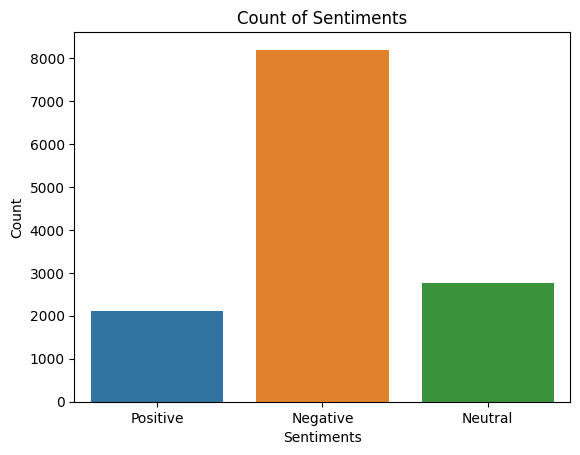

In [5]:
ax = sns.countplot(x='airline_sentiment', data=df_train)
ax.set(xlabel='Sentiments', ylabel='Count', title="Count of Sentiments")
ax.set_xticklabels(['Positive', 'Negative', 'Neutral'])

| Sentiment   | Frequency   |
| :---------: | :---------: |
| Negative    | 8192        |
| Neutral     | 2769        |
| Positive    | 2111        |

Table 1 : Count of Airline Sentiments

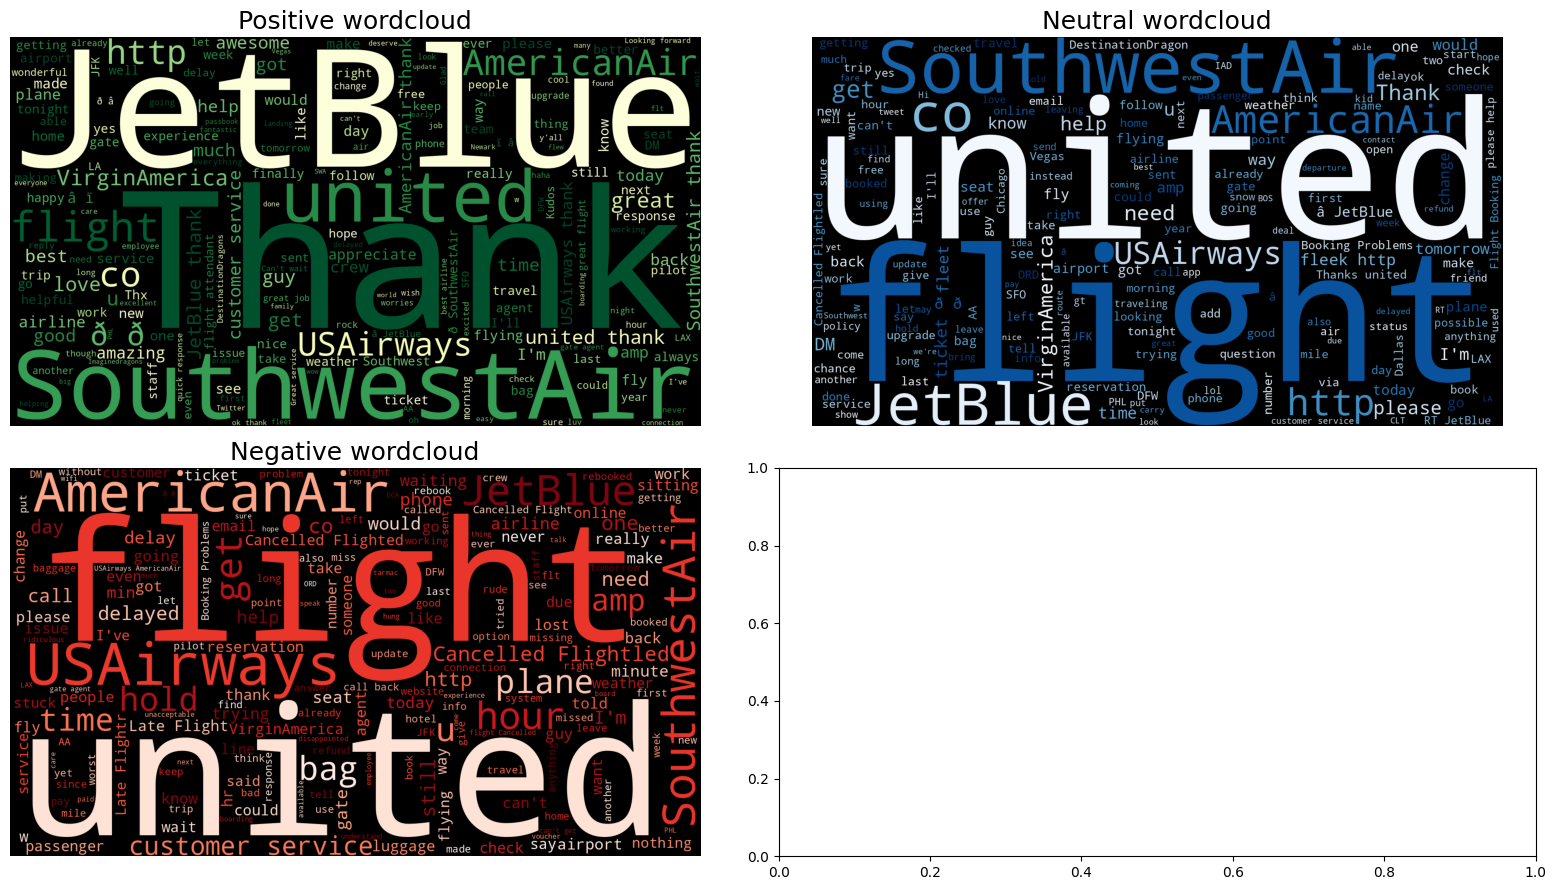

In [6]:
sentiment_list = ["positive", "neutral", "negative"]
label_sentiment_list = ['Positive', 'Neutral', 'Negative']
colormap_list = ["YlGn_r", "Blues_r", "Reds_r"]
ax_list = [[0,0], [0,1], [1,0]]


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,9))
for sentiment,label_sentiment,(row,col),colormap in zip(sentiment_list,label_sentiment_list,ax_list,colormap_list):

    # Create a wordcloud for each sentiment
    text = " ".join(content for content in df_train[df_train["airline_sentiment"]==sentiment]["text"])
    wordcloud = WordCloud(colormap=colormap, stopwords=set(stopwords.words('english')), width=1600, height=900).generate(text)

    # Plot a wordcloud
    ax[row,col].imshow(wordcloud)
    ax[row,col].set_title(label_sentiment+" wordcloud", fontsize=18)
    ax[row,col].axis('off')

fig.tight_layout()

## 4. Data Cleaning

The subsequent task involves cleaning our dataset. To prepare the dataset for the machine learning model, it is essential to ensure that our dataset is cleaned. During the cleaning process, We should consider of converting our dataset into _**lowercase, remove english stopwords, and punctuations**_. Additionally, we must also _**eliminate usernames**_ starting with '@' and any _**associated links (URL's)**_, _**repeating characters and numbers**_, as they are not relevant to the objectives of this project. Furthermore, we use _**lemmatization technique**_ to standardize and _**reduce words to their base or root form**_, _**aiding in the extraction of core meanings**_. This process is valuable for _**handling variations in language, slang, and misspellings commonly found in tweets**_, *improving the accuracy of sentiment analysis models*. Lastly, we use _**Tokenization**_ which is crucial for Twitter sentiment analysis as it **breaks down tweets into individual units (tokens)**, allowing for _effective handling of short texts, extracting meaningful features, addressing variations in language, and preparing the data for machine learning models_.

In [7]:
# function turns pos_tag into wordnet_pos
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None


# Data Preprocessing
def data_processing(text):
    text = text.lower()                                             # Convert to lowercase
    text = re.sub(r'@[A-Za-z0-9]+', '', text)                       # Removed @mentions / @username
    text = re.sub(r'(.)1+', r'1', text)                             # Remove repeating characters
    text = re.sub('((www.[^s]+)|(https?://[^s]+))',' ', text)       # Cleaning URL's
    text = re.sub('[0-9]+', '', text)                               # Remove numbers

    #tokenize
    text_tokenize = word_tokenize(text)

    #split text and entity
    entity = text_tokenize[0]
    text_content = text_tokenize[1:]

    #pos tagging
    text_pos = pos_tag(text_content)

    #remove punctuation and stopwords
    remove_words = set(list(string.punctuation) + stopwords.words('english'))
    text_remove = [(word,pos) for (word,pos) in text_pos if word not in remove_words]

    #lemmatization
    word_lem = WordNetLemmatizer()
    text_lem = [(word_lem.lemmatize(word,pos=get_wordnet_pos(pos)),pos) if get_wordnet_pos(pos) != None
                 else (word_lem.lemmatize(word),pos) for (word,pos) in text_remove]

    #combine text and entity
    text_lem.append((entity,))

    return text_lem

## 5. Feature Engineering

### 5.1  Pipeline of CountVectorizer and TfidfTransformer

Utilizing our designated _**data_processing function**_, which segregates sets for training and testing as X_train, y_train, X_test, and y_test, we proceed to build the model. Subsequently, we apply a _**Pipeline with CountVectorizer, utilizing the data_processing function as the analyzer, and incorporating TfidfTransformer**_ separately for both the training and testing data. During this process, we perform transform on the X_train and X_test data. The resulting output reveals an _**increase in the size of both the training and testing sets**_ by a certain factor, attributed to _lemmatization (Word Variation, Normalization, and Vocabulary Reduction)_. This increase occurs as _**each word is transformed to its base form (lemmatized)**_, and _**non-essential words (stopwords) are eliminated from the dataset**_.

In [8]:
X_train, y_train = df_train['text'], df_train['airline_sentiment']
X_test, y_test = df_test['text'], df_test['airline_sentiment']

print("Shape of original train data: ", X_train.shape)
print("Shape of original test data: ", X_test.shape)


#Combine text_preprocessing, CountVectorizer and TfidfTransformer into pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=data_processing)),
    ('tfidf', TfidfTransformer())
])

#Apply pipeline to x_train and x_test
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)
print("Shape of processed train data: ", X_train_processed.shape)
print("Shape of processed test data: ", X_test_processed.shape)

Shape of original train data:  (13072,)
Shape of original test data:  (1455,)
Shape of processed train data:  (13072, 18014)
Shape of processed test data:  (1455, 18014)


## 6. Model Evaluation Function

After completing the training phase, it becomes crucial to utilize model evaluation functions to gauge the model's performance. We will establish a dedicated function for evaluating the model post-training. The assessment will involve employing the following techniques:

1. F1-measure
2. Classification Report
3. Visualization of the Confusion Matrix

In [9]:
# Let's define the function for our model evaluation

def model_evaluation(model, X_test, y_test):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    print(f"The following evaluation is for {model.__class__.__name__}:")
    # Calculate F1-Measure
    print("F1-measure: ", round(f1_score(y_test, y_pred, average="weighted")*100, 2))
    # Print the evaluation metrics for the dataset.
    print('The Classification Report is - \n', classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive','Neutral']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v2}' for v2 in group_percentages]
    labels = np.asarray(labels).reshape((3, 3))
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '', xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

## 7. Model Building

Having set up the Model Evaluation function, let's now delve into the process of model construction with _**a primary emphasis on attaining superior accuracy**_. We will advance in creating the following **four models**:

1. Decision Tree Classifier
2. Random Forest Classifier
3. Logistic Regression
4. Support Vector Machine Classifier

### 7.1 Decision Tree Classifier

**Decision Tree:** Imagine you want to decide whether to go outside to play based on the weather. A decision tree is like a **flowchart** that helps you make this decision. It asks questions like "Is it sunny?" or "Is it raining?" and guides you to a decision, such as "Go outside" or "Stay indoors."

**Decision Tree Classifier**: A decision tree classifier is a type of machine learning model that makes decisions by _recursively splitting the dataset into subsets_ based on the features of the data. It's a **tree-like model** where each **node represents a decision based on a specific feature**, and each **branch represents the possible outcome of that decision**. The **leaves of the tree represent the final decision or classification**.

In the context of the _Twitter sentiment analysis problem_, we can establish a DecisionTreeClassifier and _train it using the provided training dataset_. Subsequently, we can assess its _performance by evaluating it on a separate and unseen testing dataset_.

The following evaluation is for DecisionTreeClassifier:
F1-measure:  67.26
The Classification Report is - 
               precision    recall  f1-score   support

    negative       0.78      0.79      0.79       914
     neutral       0.43      0.42      0.43       309
    positive       0.54      0.56      0.55       232

    accuracy                           0.67      1455
   macro avg       0.59      0.59      0.59      1455
weighted avg       0.67      0.67      0.67      1455



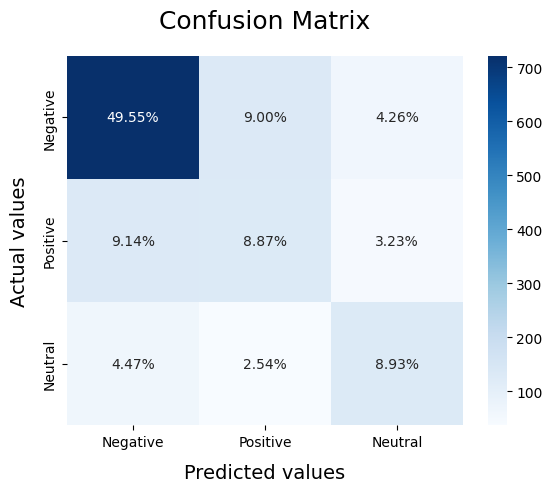

In [10]:
# Decision Tree Classifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier = decision_tree_classifier.fit(X_train_processed, y_train)
model_evaluation(decision_tree_classifier, X_test_processed, y_test)

**Evaluation**: The DecisionTreeClassifier yields an **F1-measure of around 67.26%**, while the **accuracy stands at approximately 68.00%**, based on the model's output.

### 7.2 Random Forest Classifier

**Random Forest classifier**: A Random Forest classifier is an ensemble learning method that combines the **predictions of multiple individual decision trees** to _improve overall predictive accuracy and robustness_.

Applying a _Random Forest to Twitter sentiment analysis_ allows the model to _capture complex patterns in the data, handle a variety of features, and mitigate overfitting_. It is a powerful and versatile algorithm for sentiment classification tasks, especially when _dealing with noisy and diverse text data_ from social media platforms like Twitter.

We will apply the _RandomForestClassifier_ to the _training dataset_ and then assess the _model's performance_ using an _unseen testing dataset_.

The following evaluation is for RandomForestClassifier:
F1-measure:  73.93
The Classification Report is - 
               precision    recall  f1-score   support

    negative       0.79      0.91      0.85       914
     neutral       0.63      0.48      0.54       309
    positive       0.69      0.50      0.58       232

    accuracy                           0.75      1455
   macro avg       0.70      0.63      0.66      1455
weighted avg       0.74      0.75      0.74      1455



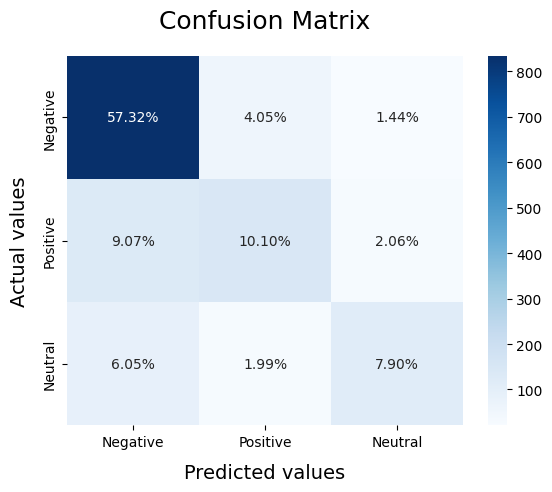

In [11]:
# Random Forest Classifier
random_forest_classifier = RandomForestClassifier()
random_forest_classifier = random_forest_classifier.fit(X_train_processed, y_train)
model_evaluation(random_forest_classifier, X_test_processed, y_test)

**Evaluation**: The RandomForestClassifier produces an **F1-measure of about 73.93%**, with an **accuracy of roughly 75.63%**, as indicated by the model's results.

### 7.3 Logistic Regression

**Logistic Regression**: Logistic Regression is a popular choice for sentiment analysis due to its _'simplicity, efficiency, and interpretability'_. In the context of Twitter sentiment analysis, Logistic Regression is a machine learning algorithm used to predict the sentiment (positive, negative, or neutral) of tweets.

The following evaluation is for LogisticRegression:
F1-measure:  77.04
The Classification Report is - 
               precision    recall  f1-score   support

    negative       0.80      0.93      0.86       914
     neutral       0.70      0.49      0.58       309
    positive       0.78      0.58      0.67       232

    accuracy                           0.78      1455
   macro avg       0.76      0.67      0.70      1455
weighted avg       0.78      0.78      0.77      1455



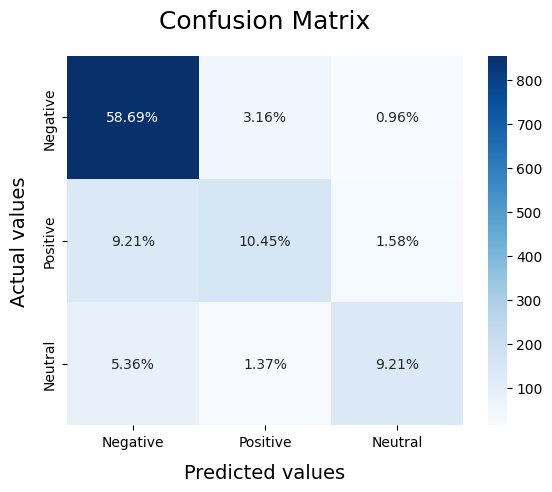

In [12]:
# Logistic Regression
LRmodel = LogisticRegression()
LRmodel = LRmodel.fit(X_train_processed, y_train)
model_evaluation(LRmodel, X_test_processed, y_test)

**Evaluation**: The _LogisticRegression_ achieves an **F1-measure of approximately 77.04%** and an **accuracy of around 78.00%**, according to the model's outcomes.

### 7.4 Support Vector Machine Classifier

**Support Vector Machines (SVM)**: Support Vector Machines (SVM) for Twitter sentiment analysis involves using the SVM algorithm to predict the sentiment (positive, negative, or neutral) of tweets. SVM is a supervised machine learning model that works well for both linear and non-linear classification tasks.

SVM is effective for sentiment analysis due to its -ability to handle complex decision boundaries in high-dimensional spaces_. _It seeks to find the optimal hyperplane that maximally separates different sentiment classes_.

The following evaluation is for LinearSVC:
F1-measure:  77.34
The Classification Report is - 
               precision    recall  f1-score   support

    negative       0.83      0.89      0.86       914
     neutral       0.63      0.54      0.58       309
    positive       0.73      0.65      0.68       232

    accuracy                           0.78      1455
   macro avg       0.73      0.69      0.71      1455
weighted avg       0.77      0.78      0.77      1455



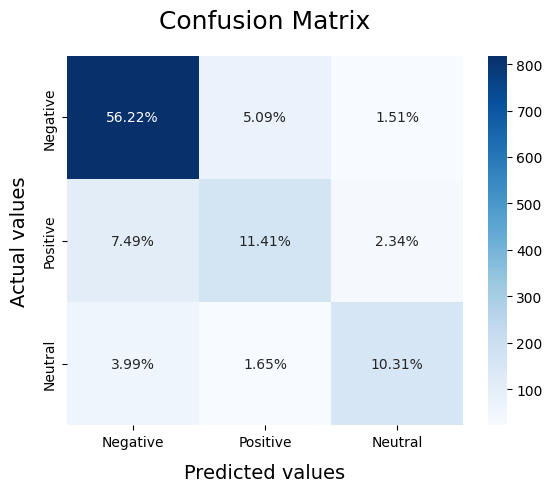

In [13]:
# Linear SVC
SVCmodel = LinearSVC()
SVCmodel = SVCmodel.fit(X_train_processed, y_train)
model_evaluation(SVCmodel, X_test_processed, y_test)

**Evaluation**: The _LinearSVC_ attains an **F1-measure of approximately 77.34%** and achieves an **accuracy of around 78.00%**, as indicated by the model's results.

## 8. Conclusion

**In conclusion**, our evaluation of different classifiers for Twitter sentiment analysis revealed varying performance metrics. **The Decision Tree Classifier yielded an F1-measure of approximately 67.26%**, the **Random Forest Classifier achieved nearly 73.93%**, **Logistic Regression demonstrated roughly 77.04%**, and **the Support Vector Machine (SVM) Classifier** outperformed them all with an impressive **F1-measure of about 77.34%**. This indicates that the **`Support Vector Machine Classifier`** is the most effective model among the tested algorithms, showcasing the **`highest accuracy score at 77.34%`**. Consequently, for the specific task of Twitter sentiment analysis, the **`SVM Classifier stands out as the preferred choice for accurately predicting sentiments in tweets`**.

## 9. References

1. Bento, C. (2021, June 28). Decision Tree Classifier explained in real-life: picking a vacation destination. Retrieved from Medium: https://towardsdatascience.com/decision-tree-classifier-explained-in-real-life-picking-a-vacation-destination-6226b2b60575

2. Sahani, D. (2020, Oct 11). Understanding CountVectorizer, Tfidftransformer & Tfidfvectorizer with Calculation. Retrieved from Medium: https://sahanidharmendra19.medium.com/understanding-countvectorizer-tfidftransformer-tfidfvectorizer-with-calculation-7d509efd470f

3. Stecanella, B. (2017, June 22). Support Vector Machines (SVM) Algorithm Explained. Retrieved from MonkeyLearn: https://monkeylearn.com/blog/introduction-to-support-vector-machines-svm/

4. Yiu, T. (2019, Jun 12). Understanding Random Forest. Retrieved from Towards Data Science: https://towardsdatascience.com/understanding-random-forest-58381e0602d2


----
----

# Project 2 : (4) Time-series dataset (Weather)

___

## Problem Statement

**Problem Statement**: In this undertaking, various machine learning models will be utilized to evaluate their precision in **forecasting future values with the best model out of the two models.**.

## 1. Import required libraries

The initial phase involves importing essential libraries like **numpy, pandas, and matplotlib**. Given the project's focus on time-series, the subsequent library to be imported is the **datetime library**, specifically for handling time-series datasets. Following that, we've set up the Keras model to construct neural networks for our project. In particular, we'll need the `Sequential` model, utilizing the `RMSprop optimizer`. Furthermore, we've brought in certain layers from `keras.layers` and metrics for assessing the model. Afterward, we configured the `scikit-learn` library, employing `MinMaxScaler` *to normalize* our data and `tensorflow` for neural networks. We've also imported `VAR` from `statsmodels.tsa.api`.

In [14]:
# Utility
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# datetime library to handle time-series dataset
from datetime import datetime, timedelta

# Tensorflow
import tensorflow as tf

# Keras
import keras
from keras.models import Sequential
from keras.layers import Input, Dense, GRU, Embedding, LSTM, Dropout
from keras.optimizers import Adam, RMSprop
from keras.metrics import RootMeanSquaredError
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

from statsmodels.tsa.api import VAR

# Sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold

warnings.filterwarnings('ignore')

## 2. Load the required data

Data has been gathered in the CSV file named `weather.csv`. The weather dataset was obtained from a *Raspberry Pi computer* situated at a *residence in Newcastle*. The weather data was gathered over an *approximate duration of 12 months*. The data is collected at *one-minute interval*. Notably, the file *lacks predefined columns* for this dataset. To address this, we will construct a *list comprising column names*. When reading or storing the CSV file into the dataframe `df`, this list of columns will be provided.

In [15]:
data_URL = "/content/drive/MyDrive/Masters ML Coursework/Time Series Project/weather.csv"
columns = ["date_time", "inside_temp_1", "outside_temp", "cpu_temp", "count", "inside_temp_2", "air_pressure", "humidity"]
df = pd.read_csv(data_URL, names=columns)
df.head()

,date_time,inside_temp_1,outside_temp,cpu_temp,count,inside_temp_2,air_pressure,humidity
0,Wed 17 Nov 2021 03:20:03 PM GMT,24.2,9.8,35.780,1,26.11,1006.79,31.14
1,Wed 17 Nov 2021 03:21:02 PM GMT,24.2,9.8,36.318,1,26.22,1006.76,31.03
2,Wed 17 Nov 2021 03:22:03 PM GMT,24.2,9.8,36.856,1,26.24,1006.80,30.98
3,Wed 17 Nov 2021 03:23:05 PM GMT,24.2,9.8,40.840,1,26.28,1006.84,30.91
4,Wed 17 Nov 2021 03:24:02 PM GMT,24.2,9.8,36.856,1,26.47,1006.86,30.77


## 3. Data Exploration

The subsequent phase in constructing a machine learning model involves exploring our data to filter out pertinent information for analysis. During the exploration phase, we identified columns such as `date_time`, `inside_temp_1`, `outside_temp`, `cpu_temp`, `count`, `inside_temp_2`, `air_pressure`, and `humidity`. It's noteworthy that this dataset encompasses over 545,400 rows.
Upon deeply inspecting the dataset information, we identified a single missing value in the `date_time` column, which was also not in datetime format. Furthermore, we scrutinized the statistical summary of all variables, encompassing `count`, `mean`, `standard deviation`, `maximum values`, `minimum values`, and `quartile values`. This was followed by *plotting histograms for the critical and necessary variables*.

In [16]:
# Info about the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545437 entries, 0 to 545436
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date_time      545436 non-null  object 
 1   inside_temp_1  545437 non-null  float64
 2   outside_temp   545437 non-null  float64
 3   cpu_temp       545437 non-null  float64
 4   count          545437 non-null  int64  
 5   inside_temp_2  545437 non-null  float64
 6   air_pressure   545437 non-null  float64
 7   humidity       545437 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 33.3+ MB


In [17]:
# describe the data.
df.describe()

,inside_temp_1,outside_temp,cpu_temp,count,inside_temp_2,air_pressure,humidity
count,545437.000000,545437.000000,545437.000000,545437.000000,545437.000000,545437.000000,545437.000000
mean,21.177087,11.189098,33.285307,1.000004,23.401962,1001.626618,36.735238
std,3.289629,6.855672,2.903622,0.002708,3.142856,11.940412,7.410355
min,11.300000,-3.100000,25.200000,1.000000,14.520000,958.660000,19.850000
25%,18.800000,6.300000,31.476000,1.000000,21.210000,994.280000,30.950000
50%,21.100000,10.200000,33.628000,1.000000,23.460000,1002.530000,35.710000
75%,23.200000,14.900000,34.704000,1.000000,25.270000,1009.640000,41.780000
max,36.200000,49.000000,47.780000,3.000000,38.510000,1031.780000,58.710000


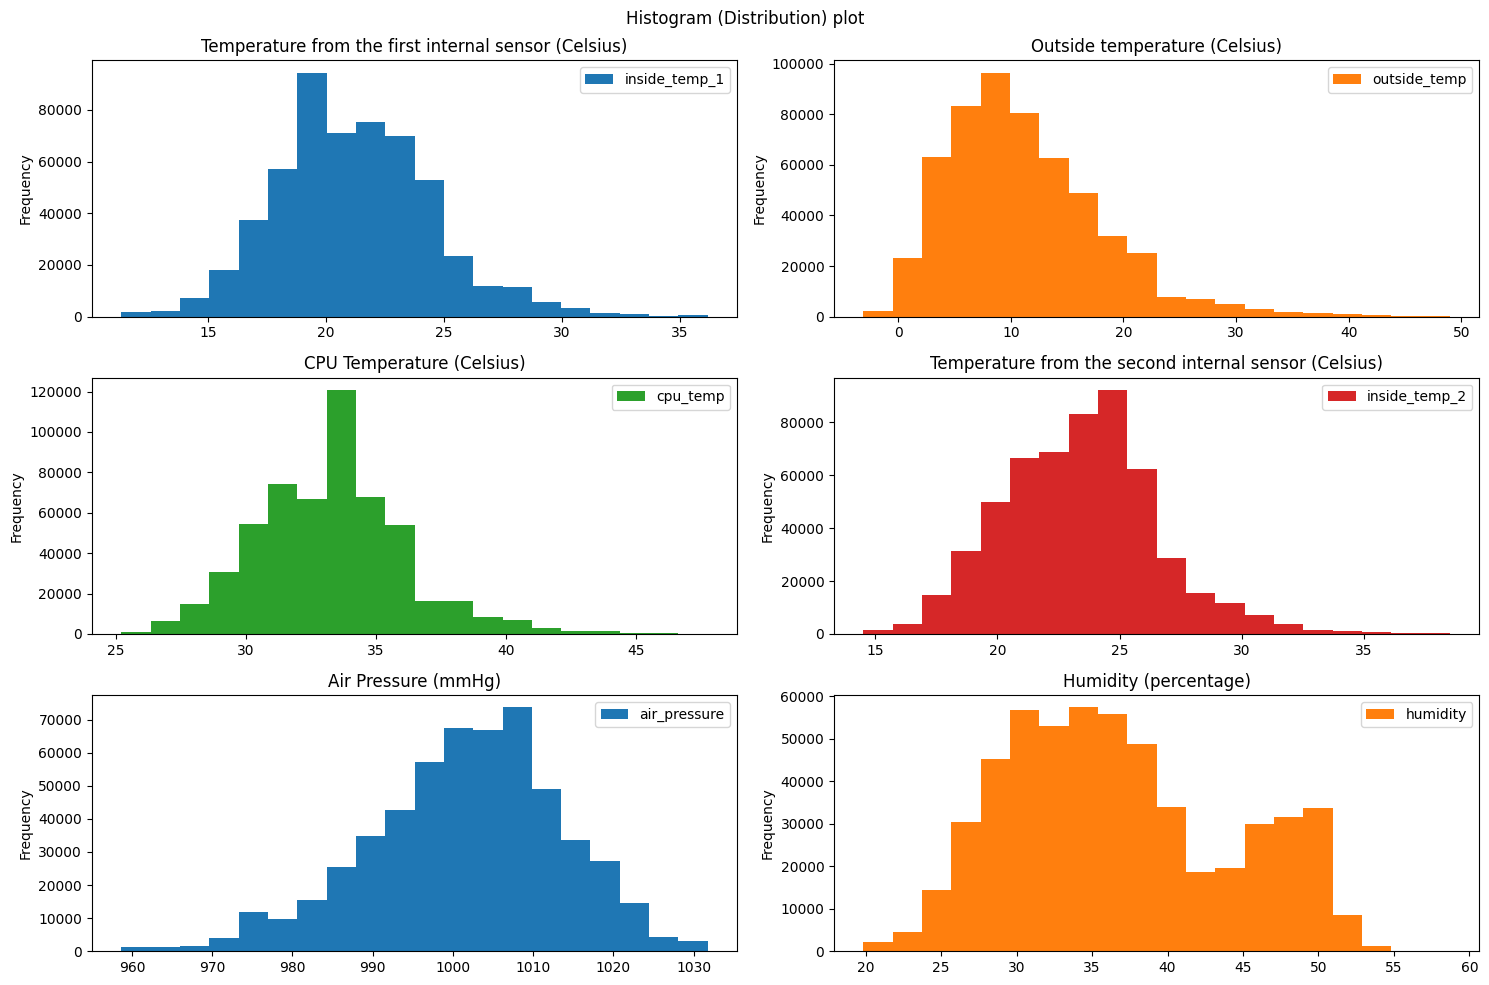

In [18]:
# Histogram (Distribution) all 6 variables

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))  # define the figure and subplots
fig.suptitle('Histogram (Distribution) plot')
axes = axes.ravel()  # array to 1D
cols = df[["inside_temp_1", "outside_temp", "cpu_temp", "inside_temp_2", "air_pressure", "humidity"]]  # create a list of dataframe columns to use
titles = ['Temperature from the first internal sensor (Celsius)', 'Outside temperature (Celsius)', 'CPU Temperature (Celsius)', 'Temperature from the second internal sensor (Celsius)', 'Air Pressure (mmHg)', 'Humidity (percentage)']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:blue', 'tab:orange']  # list of colors for each subplot

for col, color, ax, title in zip(cols, colors, axes, titles):
    df[col].plot(kind='hist', ax=ax, bins=20, color=color, label=col, title=title)
    ax.legend()

fig.tight_layout()
plt.show()

## 4. Data Cleaning

The subsequent phase after exploration involves cleaning our initial dataset. As evidenced by the above exploration analysis and the code outputs below, there was only one NA value detected in the `date_time` column. This was addressed by *determining and setting the midpoint between the preceding and succeeding values*. Additionally, there was a single duplicated entry, and it was resolved by *retaining the initial occurrence of the value*.

Furthermore, our dataset includes a `count` column with values of 1 and 3. However, the value 3 appeared only once, while 1 was predominant. Consequently, *we opted to eliminate this column*. Lastly, since our project focuses on a time series problem, the datetime column's format wasn't standard. To facilitate further analysis, *we converted it to a datetime format and set it as the index of our dataframe*. With our data now cleaned, we can proceed to visualize it using a line plot. Accordingly, we have generated a line plot encompassing all the variables.

Examining the line plot below, it can be observed that the provided dataset is `Stationary` as the variables *do not exhibit a discernible trend*.

In [19]:
# Check and drop NA Values
print("NA values in our original dataset:\n", df.isna().sum(), '\n')
print(df[df.isna().date_time == True].date_time, '\n\n')

# Manually establishing and setting the midpoint of the date and time between the preceding and subsequent values.
df.date_time.fillna("Sat 10 Sep 2022 08:02:02 PM BST", inplace=True)
print("After dealing with NA Value: ", df.isna().sum().date_time, '\n')

NA values in our original dataset:
 date_time        1
inside_temp_1    0
outside_temp     0
cpu_temp         0
count            0
inside_temp_2    0
air_pressure     0
humidity         0
dtype: int64 

427898    NaN
Name: date_time, dtype: object 


After dealing with NA Value:  0 



In [20]:
# Check and drop duplicated values by keeping the first one.
print("Total duplicate values in our original dataset: ", df.duplicated().sum(), '\n')
df.drop_duplicates(keep='first', inplace=True)

Total duplicate values in our original dataset:  1 



In [21]:
# Get unique counts of count
print("Unique Count: ", df.groupby('count').count()['date_time'], '\n')

# Drop count column from the dataframe
df.drop(['count'], axis=1, inplace=True)
print(f"After dropping count column: {df.shape}")

Unique Count:  count
1    545435
3         1
Name: date_time, dtype: int64 

After dropping count column: (545436, 7)


In [22]:
# Convert date_time (string) to date time (object) and set date_time to index
df['date_time'] = pd.to_datetime(df['date_time'], utc=True)
df.set_index('date_time', inplace=True)

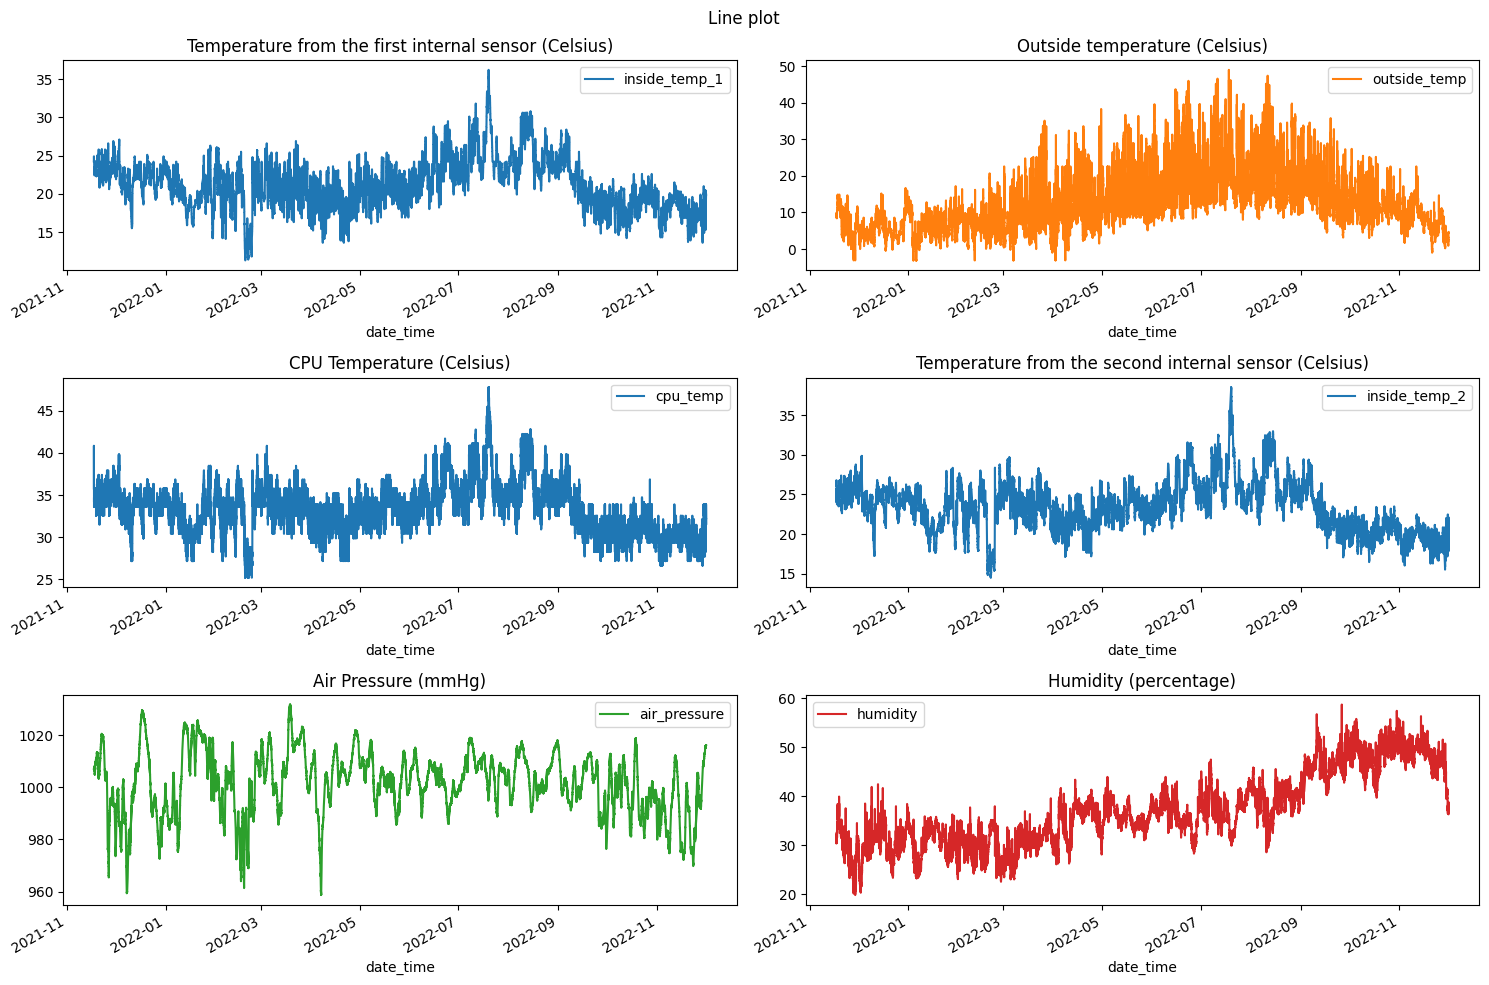

In [23]:
# Line plot for all 6 variables

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))  # define the figure and subplots
fig.suptitle('Line plot')
axes = axes.ravel()  # array to 1D
cols = df.columns  # create a list of dataframe columns to use
titles = ['Temperature from the first internal sensor (Celsius)', 'Outside temperature (Celsius)',
          'CPU Temperature (Celsius)', 'Temperature from the second internal sensor (Celsius)',
          'Air Pressure (mmHg)', 'Humidity (percentage)'] # list of titles for each subplot
colors = ['tab:blue', 'tab:orange', 'tab:blue', 'tab:blue', 'tab:green', 'tab:red']  # list of colors for each subplot

for col, color, ax, title in zip(cols, colors, axes, titles):
    df[col].plot(kind='line', ax=ax, color=color, label=col, title=title)
    ax.legend()

fig.tight_layout()
plt.show()

## 5. Split dataset

The subsequent stage in our machine learning model *involves dividing our dataset into training and testing sets*. Given that this project revolves around Time-Series analysis, it is crucial to ensure that _both datasets maintain a continuous and distinct test set_ **_to prevent any leakage between training and testing phases_**. Considering this, we will utilize **the data from the last two months for testing**, allocating the remaining duration for the training dataset. Following that, we have established a function named `separate_X_y`, which, given a dataframe, provides *the size of the X data, as well as the X and y data*.

In [24]:
# Getting last two months of data by subtracting 2 months (days = 2*30+1) from last instance of the dataframe
from_date = df.index.to_list()[-1] - timedelta(days=2*30+1)

df_train = df[df.index < pd.to_datetime(f"{from_date}", utc=True)]
df_test = df[df.index >= pd.to_datetime(f"{from_date}", utc=True)]

print("The shape of training dataset: ", df_train.shape)
print("The shape of testing dataset: ", df_test.shape)

The shape of training dataset:  (457535, 6)
The shape of testing dataset:  (87901, 6)


In [25]:
# Define function to seperate data into X and y

def seperate_X_y(df):
    shift_hour = 12
    shift_steps = shift_hour * 60

    df_targets = df.shift(-shift_steps)

    x_data = df.values[:-shift_steps]
    y_data = df_targets.values[:-shift_steps]

    # number of obser.
    num_data = len(x_data)
    return num_data, x_data, y_data

In [26]:
num_data, x_train, y_train = seperate_X_y(df_train)
print("Total number of X train data: ", num_data)

num_data, x_test, y_test = seperate_X_y(df_test)
print("Total number of Y test data: ", num_data)

num_x_signals = x_train.shape[1]
num_y_signals = y_train.shape[1]
print(f"Total features of x_train: {num_x_signals}\nTotal features of x_test: {num_y_signals}")

Total number of X train data:  456815
Total number of Y test data:  87181
Total features of x_train: 6
Total features of x_test: 6


## 6. Feature Engineering

### 6.1 MinMaxScaler

**Feature Engineering:**
Feature engineering involves *transforming or creating new features from the existing ones to enhance the performance of a machine learning model*. *It aims `to provide more relevant information` to the model, `improve interpretability`, and `boost predictive accuracy`*. Proper feature engineering can contribute significantly to the success of a machine learning model.


**Usage of MinMaxScaler:**
MinMaxScaler is used to `scale and normalize features` within a specific range, typically between `0 and 1`. This scaler transforms each feature by subtracting the minimum value and dividing by the range (difference between the maximum and minimum values). MinMaxScaler is particularly useful when working with algorithms that are `sensitive to the scale of input features`, such as `neural networks`, `k-nearest neighbors`. By ensuring that all features are on a similar scale, MinMaxScaler helps prevent certain features from dominating the learning process and aids in **_`improving model convergence and performance`_**.

In [27]:
# Scaling the data - Normalizing the data (0-1)

x_scaler = MinMaxScaler()                 # Initialize MinMaxScaler
x_train_scaled = x_scaler.fit_transform(x_train) # Fit transformer to training dataframe (df_train)

columns_scaled = columns.copy()
# Remove count and date_time
columns_scaled.remove('count')
columns_scaled.remove('date_time')

# Scale the data now!
x_test_scaled = x_scaler.transform(x_test)

y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

print("The shape of the x_train_scaled dataframe: ", x_train_scaled.shape)
print("The shape of the y_train_scaled dataframe: ", y_train_scaled.shape)

The shape of the x_train_scaled dataframe:  (456815, 6)
The shape of the y_train_scaled dataframe:  (456815, 6)


### 6.2 Data Generator

We've created a function below to produce random batches of training data for our model. This involves selecting random sequences from the dataset, considering the substantial volume of data. Training on the entire dataset at once is computationally demanding. After experimentation, we settled on an optimal `batch size of 64`, having explored options like 128 and 32.

Given that our dataset comprises one-minute intervals and our goal is to predict the next 12 hours of data, our sequence length will be `12 * 60 = 720`. In this context, 12 represents the number of hours, and 60 signifies the data points within an hour.

Subsequently, the swift training of the neural network enables the execution of multiple training epochs. Nonetheless, this brings about the risk of `overfitting`, wherein the model becomes too tailored to the training set, impeding its capacity to generalize effectively to unfamiliar data.

To mitigate this issue, we will evaluate the model's performance on the test set after each epoch. The model weights will only be saved when there is an enhancement in the test set performance, thereby fostering improved generalization capabilities.

Subsequently, a line plot has been generated for the `x_batch` and `y_batch` of the initial sequence in both batches and the first feature.



In [28]:
def batch_generator(batch_size, sequence_length):
    """
    Generator function for creating a Random Batches of Training-data
    """

    # Infinite loop (!)
    while True:
        # Allocate a new array for the batch of Input-signals.
        x_shape = (batch_size, sequence_length, num_x_signals)
        x_batch = np.zeros(shape = x_shape, dtype = np.float16)

        # Allocate a new array for the batch of Output-signals.
        y_shape = (batch_size, sequence_length, num_y_signals)
        y_batch = np.zeros(shape = y_shape, dtype = np.float16)

        # Fill the batch with random sequences of data.
        for i in range(batch_size):
            # Get a randon start-index
            # This points somewhere into the training-data
            idx = np.random.randint(int(num_data * 0.9) - sequence_length)

            # Copy the sequence of data starting at this index
            x_batch[i] = x_train_scaled[idx : idx + sequence_length]
            y_batch[i] = y_train_scaled[idx : idx + sequence_length]

        yield(x_batch, y_batch)

In [29]:
batch_size = 64

shift_hour = 12
sequence_length = shift_hour * 60
print('Sequence Length: ', sequence_length)

generator = batch_generator(batch_size = batch_size,
                            sequence_length = sequence_length)

x_batch, y_batch = next(generator)

print('Shape of x batch: ', x_batch.shape)
print('Shape of y batch: ', y_batch.shape)

Sequence Length:  720
Shape of x batch:  (64, 720, 6)
Shape of y batch:  (64, 720, 6)


In [30]:
validation_data = (np.expand_dims(x_test_scaled, axis = 0),
                   np.expand_dims(y_test_scaled, axis = 0))

print('The lenght of Validation Data: {}'.format(len(validation_data[0][0])))

The lenght of Validation Data: 87181


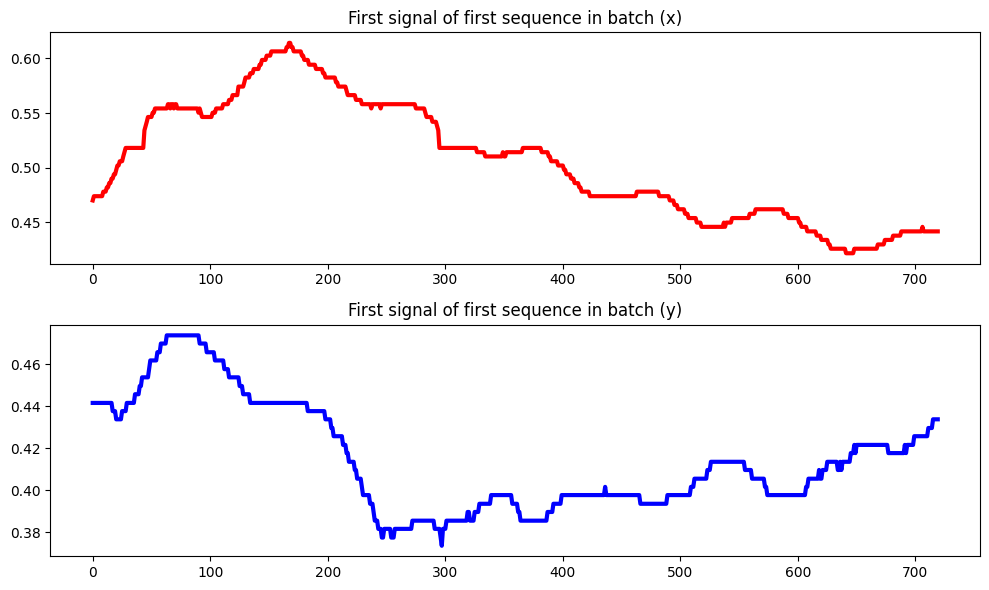

In [31]:
batch = 0  # First sequence in the batch
signal = 0 # First signal from the 6 input-signals

x_seq = x_batch[batch, :, signal]
y_seq = y_batch[batch, :, signal]

plt.figure(figsize=(10, 6))
# Plot for x_batch
# using subplot function and creating plot one
plt.subplot(2, 1, 1)
plt.plot(x_seq, 'r', linewidth=3)
plt.title('First signal of first sequence in batch (x)')

# Plot for y_batch
plt.subplot(2, 1, 2)
plt.plot(y_seq, 'b', linewidth=3)
plt.title('First signal of first sequence in batch (y)')

# space between the plots
plt.tight_layout()

# show plot
plt.show()

## 7. Model Building

Having our `x_train`, `y_train`, `x_test`, `y_test` dataset ready, let's now delve into the process of model construction. We will advance in creating the following models:

1. Gated recurrent unit (GRU) with Long Short Term Memory (LSTM)

2. Vector Auto Regression (VAR)

____

### 7.1 Gated recurrent unit (GRU) with Long Short Term Memory (LSTM)

GRU is a type of recurrent neural network architecture with gating mechanisms that helps in capturing and preserving long-term dependencies in sequential data. Later, we have also applied LSTM on the same model. LSTMs, a specialized form of RNN, are designed to address the vanishing gradient problem prevalent in traditional RNNs. Renowned for their proficiency in learning and retaining patterns in sequences over extended durations, LSTMs are widely utilized for time series analysis and forecasting. Their effectiveness in capturing temporal dependencies and managing prolonged data sequences is attributed to features like memory cells, sequential learning, and resilience to vanishing gradients. LSTMs are adaptable to varying sequence lengths, introduce non-linearities through gating mechanisms. The `mean squared error` will serve as the evaluation metric.

#### 7.1.1 Mean Squared Error

In [32]:
def loss_mse_warmup(y_true, y_pred):
    y_true_slice = y_true[:, warmup_steps:, :]
    y_pred_slice = y_pred[:, warmup_steps:, :]

    loss = tf.losses.mean_squared_error(y_true = y_true_slice,
                                        y_pred = y_pred_slice)
    loss_mean = tf.reduce_mean(loss)

    return loss_mean

### 7.1.2 Model Initialization / Building

We commenced building the model by starting with a `GRU` as the initial layer comprising `64 units`. Following this, we incorporated a hidden Dropout layer, and then applied an `LSTM` layer with the same `64 units`, succeeded by a Dense layer employing the `'sigmoid'` activation function for a total of `6 features/signals`. Later in the process, we opted for `RMSprop` as the optimizer with a learning rate of `1e-3`. Subsequently, we compiled and summarized our model.

In [33]:
model = Sequential()
model.add(GRU(units = 64, # modified: 512
              return_sequences = True,
              input_shape = (None, num_x_signals,)))
model.add(Dropout(0.2))
model.add(LSTM(units=64,
               return_sequences=True,
               input_shape = (None, num_x_signals,)))
model.add(Dense(num_y_signals, activation = 'sigmoid'))

warmup_steps = 50
optimizer = RMSprop(learning_rate = 1e-3)
model.compile(loss = loss_mse_warmup, optimizer = optimizer)

print("The summary of our model is as follows\n")
model.summary()

The summary of our model is as follows

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, None, 64)          13824     
                                                                 
 dropout (Dropout)           (None, None, 64)          0         
                                                                 
 lstm (LSTM)                 (None, None, 64)          33024     
                                                                 
 dense (Dense)               (None, None, 6)           390       
                                                                 
Total params: 47238 (184.52 KB)
Trainable params: 47238 (184.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 7.1.3 Callback Functions

In the context of neural networks models, a callback function is a set of functions that are applied at certain stages during the training process. Callbacks provide a way to customize and extend the behavior of the training process, allowing you to perform additional actions or modifications based on the model's performance or the current state of training. We've used

- Model Checkpoint
- Learning Rate Adjustment
- Tensor Board
- Early Stopping

In [34]:
path_checkpoint = 'GRU_LSTM_checkpoint.keras'
callback_checkpoint = ModelCheckpoint(filepath = path_checkpoint,
                                      monitor = 'val_loss',
                                      verbose = 1,
                                      save_weights_only = True,
                                      save_best_only = True)

callback_early_stopping = EarlyStopping(monitor = 'val_loss',
                                        patience = 5,
                                        verbose = 1)

callback_tensorboard = TensorBoard(log_dir = './GRU_LSTM_logs/',
                                   histogram_freq = 0,
                                   write_graph = False)

callback_reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                                       factor = 0.1,
                                       min_lr = 1e-4,
                                       patience = 0,
                                       verbose = 1)

callbacks = [callback_early_stopping,
             callback_checkpoint,
             callback_tensorboard,
             callback_reduce_lr]

### 7.1.4 Model Fitting

During this stage, we have trained our LSTM model using a batch from a generator with `10 epochs` and `30 steps per epoch`. Additionally, our validation set has been supplied to the model with all callbacks.

In [35]:
model.fit_generator(generator = generator,
                    epochs = 10,
                    steps_per_epoch = 30,
                    validation_data = validation_data,
                    callbacks = callbacks)

# Load Checkpoint
try:
    model.load_weights(path_checkpoint)
except Exception as error:
    print('Error trying to load checkpoint.\n{}'.format(error))

Epoch 1/10
30/30 [==============================] - ETA: 0s - loss: 0.0153
Epoch 1: val_loss improved from inf to 0.06178, saving model to GRU_LSTM_checkpoint.keras
30/30 [==============================] - 48s 1s/step - loss: 0.0153 - val_loss: 0.0618 - lr: 0.0010
Epoch 2/10
30/30 [==============================] - ETA: 0s - loss: 0.0095
Epoch 2: val_loss improved from 0.06178 to 0.05834, saving model to GRU_LSTM_checkpoint.keras
30/30 [==============================] - 59s 2s/step - loss: 0.0095 - val_loss: 0.0583 - lr: 0.0010
Epoch 3/10
30/30 [==============================] - ETA: 0s - loss: 0.0070
Epoch 3: val_loss improved from 0.05834 to 0.05332, saving model to GRU_LSTM_checkpoint.keras
30/30 [==============================] - 55s 2s/step - loss: 0.0070 - val_loss: 0.0533 - lr: 0.0010
Epoch 4/10
30/30 [==============================] - ETA: 0s - loss: 0.0067
Epoch 4: val_loss improved from 0.05332 to 0.05200, saving model to GRU_LSTM_checkpoint.keras
30/30 [=====================

### 7.1.5 Performance on Test-Set

In [36]:
result = model.evaluate(x = np.expand_dims(x_test, axis = 0),
                        y = np.expand_dims(y_test, axis = 0))

1/1 [==============================] - 10s 10s/step - loss: 165220.7812


In [37]:
print('Loss (test-set): {}'.format(result))

Loss (test-set): 165220.78125


### 7.2 Vector Auto Regression (VAR)

**Vector Autoregression (VAR):** VAR, or Vector Autoregression, is a statistical model used for time series analysis and forecasting. It is an extension of the autoregressive (AR) model that allows for the modeling of multiple time series variables simultaneously. VAR is particularly useful when the variables in the system are interrelated and influence each other.

For the sake of simplicity, we extracted a portion of our dataset to train and test our model. Subsequently, I assessed the model across lag values spanning from 1 to 50. After considering the Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) of the model, we opted for a `lag value of 35`.

In [38]:
df1_train = df_train.iloc[:100000,]
df1_test = df_test.iloc[:5000,]

df1_train.shape

(100000, 6)

In [41]:
list1=[]
model=VAR(df1_train)

lag = 35
final_model = VAR(df1_train)
final_results=final_model.fit(lag)
print(f'AIC Score for lag {lag}: ', final_results.aic)
print(f'BIC Score for lag {lag}: ', final_results.bic)

m1_pred=pd.DataFrame(final_results.forecast(df1_train.values[-lag:], steps=df1_test.shape[0]))
m1_pred.columns=df1_train.columns
print("\nPredictions on testing dataset: \n")
print(m1_pred.head())

AIC Score for lag 35:  -32.654567767766146
BIC Score for lag 35:  -32.53409639817587

Predictions on testing dataset: 

   inside_temp_1  outside_temp   cpu_temp  inside_temp_2  air_pressure  \
0      18.804653      4.706100  33.204230      23.071399   1016.410592   
1      18.808452      4.708785  33.187394      23.071161   1016.398348   
2      18.810676      4.716111  33.164137      23.071111   1016.386356   
3      18.815975      4.716638  33.170459      23.067619   1016.374851   
4      18.817021      4.703816  33.180038      23.065554   1016.364473   

    humidity  
0  27.010726  
1  27.018114  
2  27.026995  
3  27.027558  
4  27.038111  


## 8. Conclusion

In summary, we have explored two models for time series forecasting: `Vector Auto Regression (VAR)` and `Gated Recurrent Unit (GRU) with Long Short-Term Memory (LSTM)`. In the VAR model, we determined the lag value based on the `Akaike Information Criterion (AIC)` and `Bayesian Information Criterion (BIC)`. In contrast, for the `LSTM model`, we opted for `RMSprop as the optimizer`, facilitating a reduction in the learning rate. In GRU with LSTM, we've used `multiple callbacks` which will help us *to customize and extend behaviour of the training data*.

## 9. References

1. Caner, "Selecting Optimal LSTM Batch Size," 25 Mar 2020. [Online]. Available: https://medium.com/@canerkilinc/selecting-optimal-lstm-batch-size-63066d88b96b.

2. S. Saxena, "Analytics Vidhya," 4 Jan 2024. [Online]. Available: https://www.analyticsvidhya.com/blog/2021/03/introduction-to-long-short-term-memory-lstm/.

3. A. Singh, "Analytics Vidhya," 28 Nov 2023. [Online]. Available: https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/.


-----

In [1]:
def add(a, b):
    return a+b

In [2]:
import unittest

class TestAddEdgeCases(unittest.TestCase):

    def test_large_numbers(self):
        self.assertEqual(add(999999, 888888), 1887987)

    def test_floats(self):
        self.assertEqual(add(1.5, 2.5), 4.0)

    def test_none_value(self):
        with self.assertRaises(TypeError):
            add(2, None)

    def test_too_many_args(self):
        with self.assertRaises(TypeError):
            add(1, 2, 3)

    def test_too_few_args(self):
        with self.assertRaises(TypeError):
            add(1)
